In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [184]:
file_path = "/Users/sarahchamoun/Downloads/copurchased.csv"
df = pd.read_csv(file_path)

In [185]:
long_df = pd.concat([
    df[['product1', 'product2', 'co_purchase_count']].rename(columns={'product1': 'product', 'product2': 'linked_product'}),
    df[['product2', 'product1', 'co_purchase_count']].rename(columns={'product2': 'product', 'product1': 'linked_product'})
])
print(long_df)

      product  linked_product  co_purchase_count
0           0              12                  4
1           0             379                  4
2           0             140                  3
3           1             346                  9
4           1             379                  2
...       ...             ...                ...
1481      486             468                  4
1482      498             477                  5
1483      489             482                 14
1484      492             483                 13
1485      489             487                  9

[2972 rows x 3 columns]


In [186]:
degree = long_df.groupby('product').count()['linked_product'].reset_index()
degree.columns = ['product', 'degree']
weighted = long_df.groupby('product').sum(numeric_only=True)['co_purchase_count'].reset_index()
weighted.columns = ['product', 'weighted_degree']
metrics = pd.merge(degree, weighted, on='product')

In [187]:
print(degree)

     product  degree
0          0       3
1          1       3
2          2       8
3          3       8
4          4       3
..       ...     ...
495      495       8
496      496       4
497      497       5
498      498       6
499      499       2

[500 rows x 2 columns]


In [188]:
print(weighted)

     product  weighted_degree
0          0               11
1          1               21
2          2               68
3          3               46
4          4               30
..       ...              ...
495      495               55
496      496               35
497      497               42
498      498               48
499      499               15

[500 rows x 2 columns]


In [189]:
print(metrics)

     product  degree  weighted_degree
0          0       3               11
1          1       3               21
2          2       8               68
3          3       8               46
4          4       3               30
..       ...     ...              ...
495      495       8               55
496      496       4               35
497      497       5               42
498      498       6               48
499      499       2               15

[500 rows x 3 columns]


In [190]:
top_degree = metrics.nlargest(30, 'degree')
top_weighted = metrics.nlargest(30, 'weighted_degree')
top_products = pd.unique(pd.concat([top_degree['product'], top_weighted['product']]))

In [191]:
print(top_degree)
print(top_weighted)
print(top_products)

     product  degree  weighted_degree
185      185      14               98
232      232      14              104
93        93      13              115
219      219      13              102
57        57      12               64
194      194      12              106
382      382      12              111
13        13      11               98
34        34      11               93
125      125      11               97
179      179      11               93
242      242      11               54
257      257      11               66
259      259      11               86
291      291      11               87
407      407      11               79
433      433      11              102
436      436      11              101
485      485      11              115
9          9      10               89
11        11      10               66
18        18      10              100
22        22      10               80
38        38      10               69
53        53      10               90
62        62

In [192]:
filtered = df[
    df['product1'].isin(top_products) &
    df['product2'].isin(top_products)
]

In [193]:
print(filtered)

      product1  product2  co_purchase_count
68          11       382                  8
70          11       219                 13
74          11       185                  3
86          13       136                 12
89          13       174                  5
90          13        57                  9
94          13       232                 15
116         18       243                 15
140         22       124                  7
142         22       242                  7
197         34       104                  5
221         38        53                  3
333         59       124                 13
362         63       398                  5
511         93       194                 10
518         93       219                 11
520         93       291                  5
566        104       232                  9
594        111       174                 12
597        111       259                 10
598        111       136                 10
791        154       219        

In [194]:
filtered.to_csv("/Users/sarahchamoun/Downloads/copurchase_top30.csv", index=False)

In [195]:
heatmap_data = filtered.pivot(index='product1', columns='product2', values='co_purchase_count').fillna(0)

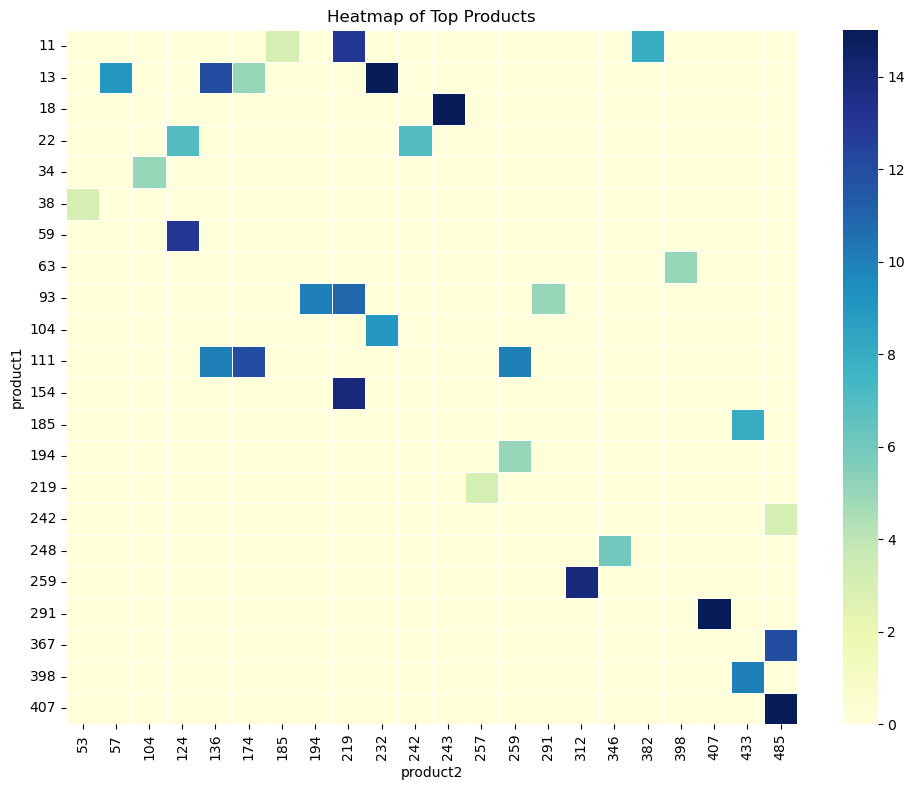

In [196]:
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5)
plt.title("Heatmap of Top Products")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

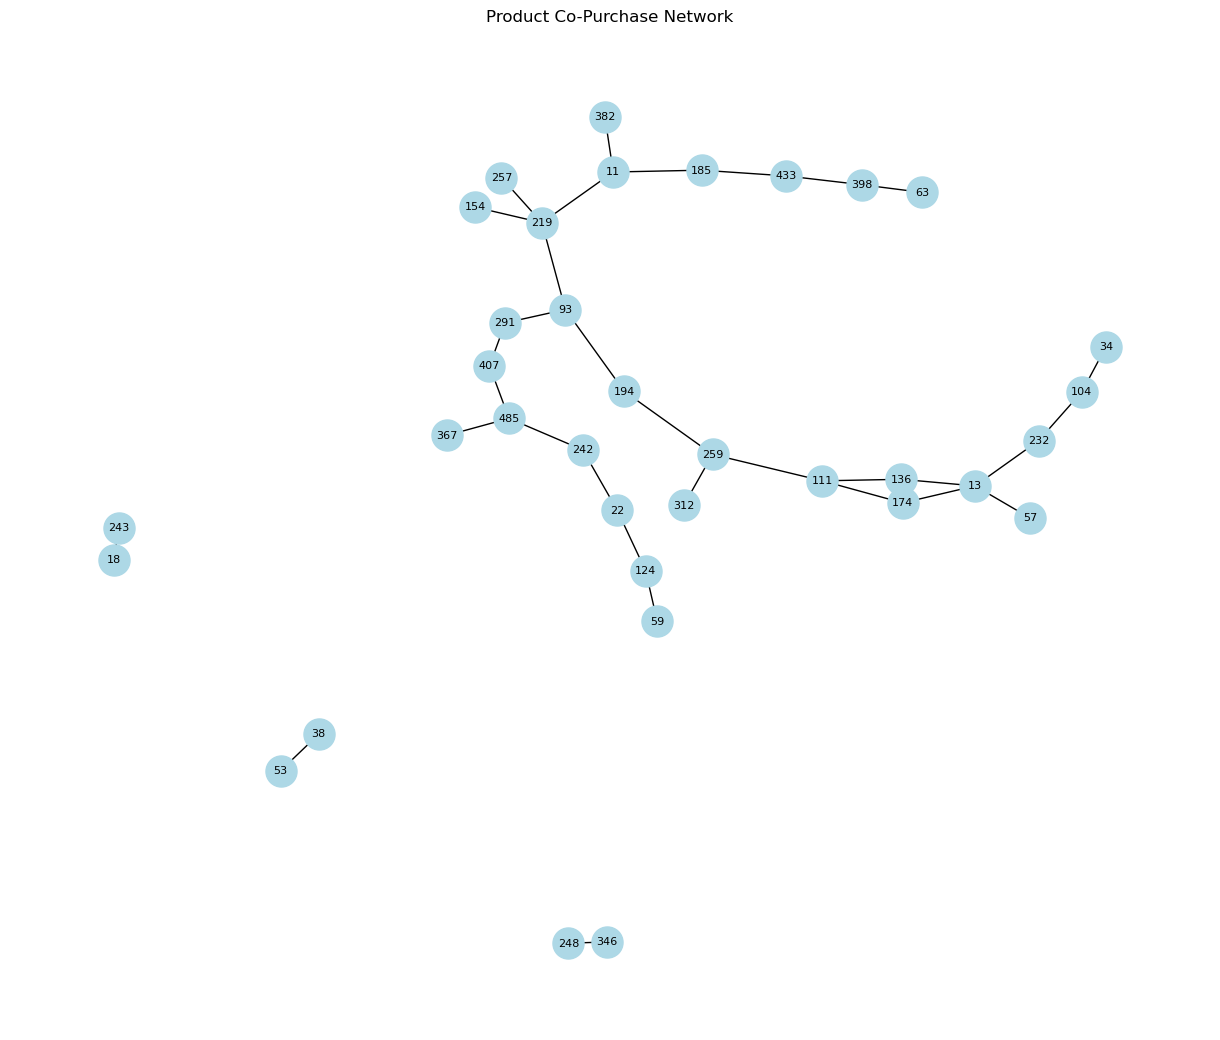

In [233]:
G = nx.from_pandas_edgelist(filtered, 'product1', 'product2')
plt.figure(figsize=(12, 10))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=500, font_size=8)
plt.title("Product Co-Purchase Network")
plt.show()